In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('./train_null.csv')
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [5]:
test = pd.read_csv('./test_null.csv')
test.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29306,18,NaN,245274,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States
1,29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
2,29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
3,29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


데이터 전처리 및 데이터 탐색

In [6]:
# income 존재
train.columns
# age : 나이
# workclass : 고용 형태
# fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
# education : 교육 수준
# education_num : 교육 수준 수치
# marital_status: 결혼 상태
# occupation : 업종
# relationship : 가족 관계
# race : 인종
# sex : 성별
# capital_gain : 양도 소득
# capital_loss : 양도 손실
# hours_per_week : 주당 근무 시간
# native_country : 국적
# income : 수익 (예측해야 하는 값)

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
# income 없음
test.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [8]:
# 결측치 개수확인
print(train.isnull().sum())
# 'workclass' 1663 
# 'occupation'  1668
# 'native-country' 495

no                   0
age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64


In [9]:
print('test')
print(test.isnull().sum())
# 'workclass' 1136 
# 'occupation'  1141
# 'native-country' 362

test
no                   0
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64


그럼 이 결측치들을 어떻게 처리를 해야할까
  > 일단 workclass는 하나가 엄청 많이 나와서 그걸로 다 채워주면 될듯
  > occupation 업종은 다양하게 분포가 되어있어서 인터넷/ <br> 기술통계확인은 언제하는거지 암튼 처리 해보면 나쁘진 않을듯
  > 국적..국적도 그닥 크게 필요할 것 같진 않은데

In [10]:
# workclass 확인
train[train['workclass'].isnull()]

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19,20,18,NaN,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States,0
20,21,23,NaN,194096,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
24,25,19,NaN,50626,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
37,38,24,NaN,152719,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,15,Haiti,0
47,48,23,NaN,62507,Some-college,10,Never-married,NaN,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29244,29245,28,NaN,196630,Assoc-voc,11,Separated,NaN,Unmarried,White,Female,0,0,40,Mexico,0
29247,29248,50,NaN,23780,Masters,14,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,40,United-States,0
29280,29281,22,NaN,110622,Bachelors,13,Never-married,NaN,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0
29286,29287,21,NaN,143995,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0


In [13]:
# 보면 Private 사설이 가장 많음 그냥 여기로 결측치 1663개 넣어줌
train['workclass'].value_counts()

Private             20410
Self-emp-not-inc     2305
Local-gov            1868
State-gov            1201
Self-emp-inc          987
Federal-gov           854
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [14]:
train['workclass'] = train['workclass'].fillna('Private')

In [18]:
# workclass 결측값 채워줌! 끝
train.isnull().sum()

no                   0
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [20]:
test['workclass']= test['workclass'].fillna('Private')
test['workclass']

0                 Private
1                 Private
2                 Private
3        Self-emp-not-inc
4                 Private
               ...       
19532    Self-emp-not-inc
19533             Private
19534             Private
19535             Private
19536             Private
Name: workclass, Length: 19537, dtype: object

고럼 우리 occupation은 어떻게 채워주냐

In [25]:
train[train['occupation'].isnull()]

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19,20,18,Private,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States,0
20,21,23,Private,194096,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
24,25,19,Private,50626,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
37,38,24,Private,152719,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,15,Haiti,0
47,48,23,Private,62507,Some-college,10,Never-married,NaN,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29244,29245,28,Private,196630,Assoc-voc,11,Separated,NaN,Unmarried,White,Female,0,0,40,Mexico,0
29247,29248,50,Private,23780,Masters,14,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,40,United-States,0
29280,29281,22,Private,110622,Bachelors,13,Never-married,NaN,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0
29286,29287,21,Private,143995,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0


In [27]:
train['occupation'].value_counts()

# 기술 지원, 공예 수리, 기타 서비스, 판매, 중역, 
# 전문 교수, 핸들러 청소부, 기계 조작 감독, Adm-사무, 
# 농업-어업, 운송-이사, Priv-house- 봉사, 보호 봉사, 군대.

Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

In [ ]:
# Prof-specialty  417
# Craft-repair  417
# Exec-managerial 417
# Adm-clerical  417

In [64]:
train['occupation'] = train['occupation'].fillna('Prof-specialty',limit=417)
train['occupation'] = train['occupation'].fillna('Craft-repair',limit=417)
train['occupation'] = train['occupation'].fillna('Exec-managerial',limit=417)
train['occupation'] = train['occupation'].fillna('Adm-clerical',limit=417)

In [65]:
train['occupation'].value_counts()

Prof-specialty       4141
Craft-repair         4049
Exec-managerial      4026
Adm-clerical         3857
Sales                3292
Other-service        2975
Machine-op-inspct    1811
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

In [72]:
test['occupation'] = test['occupation'].fillna('Prof-specialty',limit=417)
test['occupation'] = test['occupation'].fillna('Craft-repair',limit=417)
test['occupation'] = test['occupation'].fillna('Exec-managerial',limit=417)
test['occupation'] = test['occupation'].fillna('Adm-clerical',limit=417)

In [68]:
train['native-country'] = train['native-country'].fillna('United-States')

In [69]:
train['native-country'].value_counts()

United-States                 26796
Mexico                          579
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Columbia                         53
Poland                           53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                           25
Ireland                     

In [73]:
test['native-country'] = test['native-country'].fillna('United-States')


In [74]:
test.isnull().sum()

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [71]:
train.isnull().sum()

no                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      27637 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  28810 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [28]:
import matplotlib.pyplot as plt  # 그래프 시각화
import seaborn as sns

C:\Users\smhrd\AppData\Local\Temp\ipykernel_15420\503216281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), annot = True , cmap = 'coolwarm',linecolor="white" , annot_kws = {"size" : 14} )


<Axes: >

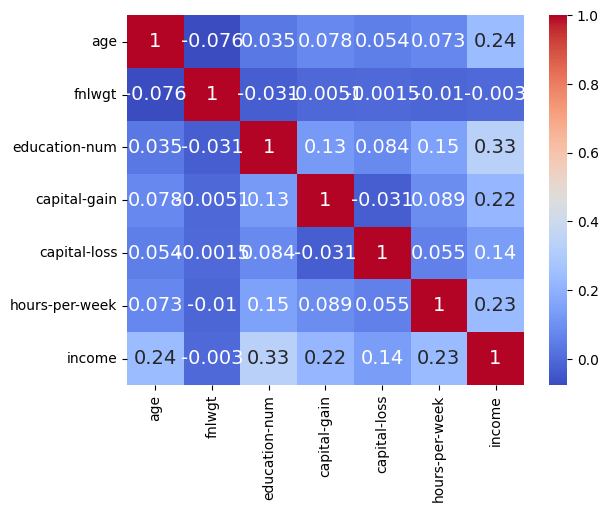

In [41]:
heatmap_data = train[['age','workclass','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','native-country','income']]
sns.heatmap(heatmap_data.corr(), annot = True , cmap = 'coolwarm',linecolor="white" , annot_kws = {"size" : 14} )

In [75]:
X_train = train.loc[ : , 'no':'hours-per-week' ]
y_train = train.loc[ : , 'income':]

X_test = test


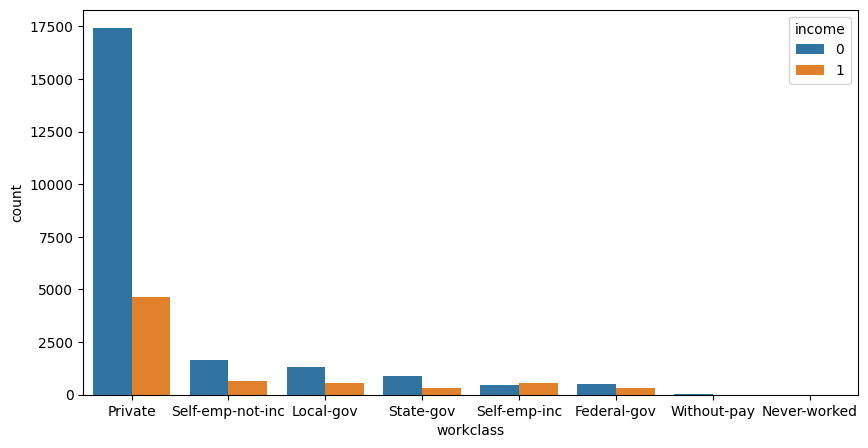

In [87]:
plt.figure(figsize= (10,5))
sns.countplot(data = train ,x = 'workclass', hue = 'income')
plt.show()

# 자영업자들이 1인사람이 되게 많네

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = train ,x = 'workclass', hue = 'income')
plt.show()